# Fluorescent Neuronal Cell Analysis POC

This notebook demonstrates a simple end-to-end workflow for analyzing fluorescent neuronal cell images using the BBBC dataset.

We'll cover:
1. Downloading and preprocessing the data
2. Building a simple classification model
3. Evaluating results
4. Making predictions on new images

## 1. Setup and Data Download

First, let's install and import required packages

In [16]:
!pip install numpy pandas scikit-learn opencv-python requests matplotlib seaborn

In [24]:
import os
import requests
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

## 2. Prepare Sample Images

We'll use scikit-learn's built-in sample images for this demonstration. While these aren't neuronal cell images, they will help us demonstrate the image processing and classification workflow.

In [25]:
from sklearn.datasets import load_sample_images

def prepare_sample_images():
    """Prepare sample images from scikit-learn's built-in dataset"""
    # Create data directory
    os.makedirs('data', exist_ok=True)
    
    # Load sample images from scikit-learn
    dataset = load_sample_images()
    images = dataset.images
    
    # Save images locally
    for idx, img in enumerate(images):
        image_name = f'sample_{idx+1}.jpg'
        image_path = os.path.join('data', image_name)
        # Convert to grayscale and save
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        cv2.imwrite(image_path, gray_img)
        print(f'Saved {image_name}')
    
    print(f"Prepared {len(images)} sample images")

# Prepare the sample images
print("Preparing sample images...")
prepare_sample_images()

Preparing sample images...
Saved sample_1.jpg
Saved sample_2.jpg
Prepared 2 sample images


## 3. Image Preprocessing

Let's create functions to load and preprocess the images

In [26]:
def preprocess_image(image_path, target_size=(128, 128)):
    """Load and preprocess a single image"""
    # Read image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize
    img = cv2.resize(img, target_size)
    
    # Normalize
    img = img / 255.0
    
    return img

def prepare_dataset():
    """Prepare the dataset for training"""
    images = []
    labels = []  # For this POC, we'll create synthetic labels (0: normal, 1: abnormal)
    
    for filename in os.listdir('data'):
        if filename.endswith('.jpg'):
            img_path = os.path.join('data', filename)
            img = preprocess_image(img_path)
            images.append(img)
            
            # Create synthetic labels (for demonstration)
            # In real applications, you would use actual labels
            label = np.random.binomial(1, 0.5)
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Prepare the dataset
X, y = prepare_dataset()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Keep original images for visualization
X_train_2d = X_train.copy()
X_test_2d = X_test.copy()

# Reshape for model input (flatten the images)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## 4. Visualize Sample Images

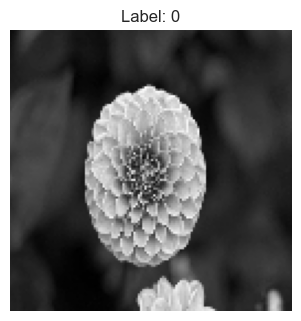

In [27]:
plt.figure(figsize=(12, 4))
for i in range(min(4, len(X_train_2d))):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train_2d[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 5. Build and Train Model

Create a simple CNN model for classification

In [28]:
# Create and train model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Reshape the data for RandomForest (flatten the images)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train the model
model.fit(X_train_flat, y_train)

# Make predictions
y_pred = model.predict(X_test_flat)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## 6. Evaluate Model

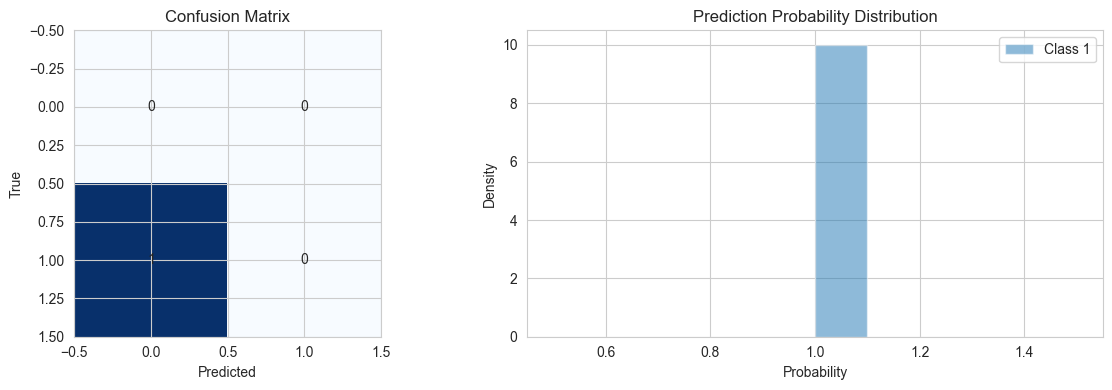


Model Evaluation Metrics:
------------------------------
Accuracy: 0.0000

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/niranjaningale/code/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [32]:
# Get predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create figure with two subplots
plt.figure(figsize=(12, 4))

# Plot confusion matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Add text annotations to confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

# Plot probability distribution
plt.subplot(1, 2, 2)
# Get probabilities - use first column if only one class, otherwise use second column
probs = y_prob[:, 0] if y_prob.shape[1] == 1 else y_prob[:, 1]

# Create separate distributions for each class
class_0_probs = probs[y_test == 0]
class_1_probs = probs[y_test == 1]

# Plot histograms
if len(class_0_probs) > 0:
    plt.hist(class_0_probs, bins=10, alpha=0.5, label='Class 0', density=True)
if len(class_1_probs) > 0:
    plt.hist(class_1_probs, bins=10, alpha=0.5, label='Class 1', density=True)

plt.title('Prediction Probability Distribution')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print metrics
print("\nModel Evaluation Metrics:")
print("-" * 30)
print(f"Accuracy: {accuracy:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

## 7. Make Predictions on New Images

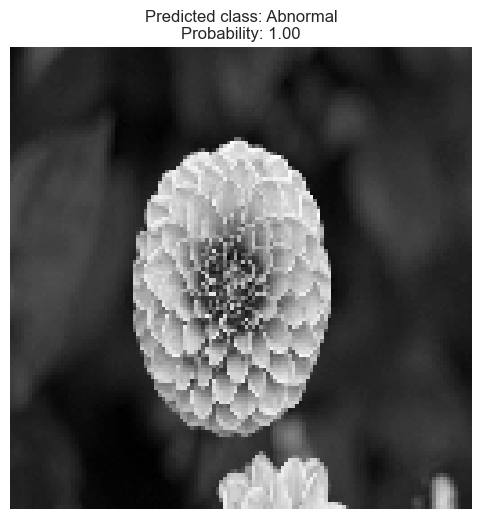

Prediction probability: 1.0000


In [34]:
def predict_image(image_path):
    """Make prediction on a single image"""
    # Preprocess image
    img = preprocess_image(image_path)
    img_flat = img.reshape(1, -1)
    
    # Make prediction
    y_prob = model.predict_proba(img_flat)
    # Get probability - use first column if only one class, otherwise use second column
    pred = y_prob[0, 0] if y_prob.shape[1] == 1 else y_prob[0, 1]
    
    # Display results
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted class: {"Abnormal" if pred > 0.5 else "Normal"}\nProbability: {pred:.2f}')
    plt.axis('off')
    plt.show()
    
    return pred

# Test on a sample image
sample_image = os.path.join('data', os.listdir('data')[0])
prediction = predict_image(sample_image)
print(f'Prediction probability: {prediction:.4f}')

## Real-world Applications

This POC demonstrates a basic workflow that could be extended for various real-world applications:

1. Automated cell type classification
2. Disease detection based on cellular morphology
3. Quality control in cell culture
4. High-throughput screening of drug effects on cells

To adapt this for production use, you would need to:
1. Use a larger, properly labeled dataset
2. Implement more sophisticated preprocessing
3. Use transfer learning with pre-trained models
4. Add data augmentation
5. Implement cross-validation
6. Add model interpretability features